## Esta memoria muestra todas las acciones realizadas en el EDA pero limitado en datasets (solo 2021 y 2020) para su mejor comprensión. Consultar el main.py, functions.py, variables.py de la carpeta Limpieza, y el main.py, functions.py, variables.py generales para consultar la totalidad del EDA

## LIMPIEZA DE DATOS

### 1. Importamos librerías Folium, Pandas, Seaborn, Matplotlib y Squarify

In [1]:
import folium
from folium import plugins
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import plotly.express as px

### 2. Importamos la relación código SITC - nombre producto en la variable metadataSITC
### 3. Cambiamos el nombre de la columna Key a SITC
### 4. Eliminamos la columna Description

In [2]:
metadataSITC = pd.read_csv("data/dataBeforeCleaning/MetadataSITC.csv", sep=";", encoding='latin-1')
metadataSITC = metadataSITC.rename(columns={"Key": "SITC"})
metadataSITC = metadataSITC.drop(labels = "Description", axis = 1)
metadataSITC.head()

,SITC,Title
0,T001082,Total goods
1,A018524,0 Food and live animals
2,A018525,00 Live animals other than animals of division 03
3,A018526,001 Live animals other than animals of divisio...
4,A018527,01 Meat and meat preparations


### 5. Importamos los datos de comercio exterior de Países Bajos en variables data20xx
### 6. Eliminamos las columnas ID, BalanceOfTrade_3, ChangeInImportValue_4 y ChangeInExportValue_5

In [3]:
# 2021
data2021 = pd.read_csv("data/dataBeforeCleaning/Data2021.csv", sep=";")
data2021 = data2021.drop(labels = "ID", axis = 1)
data2021 = data2021.drop(labels = "BalanceOfTrade_3", axis = 1)
data2021 = data2021.drop(labels = "ChangeInImportValue_4", axis = 1)
data2021 = data2021.drop(labels = "ChangeInExportValue_5", axis = 1)
# 2020
data2020 = pd.read_csv("data/dataBeforeCleaning/Data2020.csv", sep=";")
data2020 = data2020.drop(labels = "ID", axis = 1)
data2020 = data2020.drop(labels = "BalanceOfTrade_3", axis = 1)
data2020 = data2020.drop(labels = "ChangeInImportValue_4", axis = 1)
data2020 = data2020.drop(labels = "ChangeInExportValue_5", axis = 1)
# Ejemplo con 2021
data2021.head()

,SITC,Countries,Periods,ImportValue_1,ExportValue_2
0,T001082,T001047,2021JJ00,527055.0,589202.0
1,T001082,L007935,2021JJ00,253026.0,384878.0
2,T001082,L006998,2021JJ00,274029.0,204324.0
3,T001082,L007933,2021JJ00,326543.0,453827.0
4,T001082,L008519,2021JJ00,13494.0,16882.0


### 7. Hacemos un merge de metadataSITC y data (columna SITC en común). Llamamos datasetmerge1 al nuevo set de datos

In [4]:
# 2021
datasetmerge2021 = pd.merge(metadataSITC, data2021)
# 2020
datasetmerge2020 = pd.merge(metadataSITC, data2020)
# Ejemplo con 2021
datasetmerge2021.head()

,SITC,Title,Countries,Periods,ImportValue_1,ExportValue_2
0,T001082,Total goods,T001047,2021JJ00,527055.0,589202.0
1,T001082,Total goods,L007935,2021JJ00,253026.0,384878.0
2,T001082,Total goods,L006998,2021JJ00,274029.0,204324.0
3,T001082,Total goods,L007933,2021JJ00,326543.0,453827.0
4,T001082,Total goods,L008519,2021JJ00,13494.0,16882.0


### 8. Importamos la relación código país - nombre país en la variable metadataCountries
### 9. Cambiamos el nombre de la columna Key a Countries
### 10. Eliminamos la columna Description

In [5]:
metadataCountries = pd.read_csv("data/dataBeforeCleaning/MetadataCountries.csv", sep=";", encoding='latin-1')
metadataCountries = metadataCountries.rename(columns={"Key": "Countries"})
metadataCountries = metadataCountries.drop(labels = "Description", axis = 1)
metadataCountries.head()

,Countries,Title
0,L008533,Afghanistan
1,L008534,Albania
2,L008535,Algeria
3,L008536,American Samoa
4,L008537,American Virgin Islands


### 11. Hacemos un merge de datasetmerge1 y metadataCountries (columna Countries en común). LLamamos dataset al nuevo set de datos

In [6]:
# 2021
dataset2021 = pd.merge(datasetmerge2021, metadataCountries, on = "Countries")
# 2020
dataset2020 = pd.merge(datasetmerge2020, metadataCountries, on = "Countries")
# Ejemplo con 2021
dataset2021.head()

,SITC,Title_x,Countries,Periods,ImportValue_1,ExportValue_2,Title_y
0,T001082,Total goods,L008533,2021JJ00,3.0,29.0,Afghanistan
1,A018524,0 Food and live animals,L008533,2021JJ00,1.0,9.0,Afghanistan
2,A018525,00 Live animals other than animals of division 03,L008533,2021JJ00,0.0,0.0,Afghanistan
3,A018526,001 Live animals other than animals of divisio...,L008533,2021JJ00,0.0,0.0,Afghanistan
4,A018527,01 Meat and meat preparations,L008533,2021JJ00,NaN,1.0,Afghanistan


### 12. Eliminamos la columna Countries de dataset
### 13. Renombramos columnas del dataset (nuevas columnas en español y reflejando unidades). Borramos las columnas no necesarias

In [7]:
# 2021
dataset2021 = dataset2021.drop(labels = "Countries", axis = 1)
dataset2021 = dataset2021.rename(columns={"Title_x": "Productos", "Title_y": "Países", "Periods": "Año", "ImportValue_1": "Importaciones (millones de €)", "ExportValue_2": "Exportaciones (millones de €)"})
# 2020
dataset2020 = dataset2020.drop(labels = "Countries", axis = 1)
dataset2020 = dataset2020.rename(columns={"Title_x": "Productos", "Title_y": "Países", "Periods": "Año", "ImportValue_1": "Importaciones (millones de €)", "ExportValue_2": "Exportaciones (millones de €)"})
# Ejemplo con 2021
dataset2021.head()

,SITC,Productos,Año,Importaciones (millones de €),Exportaciones (millones de €),Países
0,T001082,Total goods,2021JJ00,3.0,29.0,Afghanistan
1,A018524,0 Food and live animals,2021JJ00,1.0,9.0,Afghanistan
2,A018525,00 Live animals other than animals of division 03,2021JJ00,0.0,0.0,Afghanistan
3,A018526,001 Live animals other than animals of divisio...,2021JJ00,0.0,0.0,Afghanistan
4,A018527,01 Meat and meat preparations,2021JJ00,NaN,1.0,Afghanistan


### 14. Cambiamos el valor de la columna Año a 2021 (el año que corresponda) en todas las filas

In [8]:
# 2021
dataset2021["Año"] = 2021
# 2020
dataset2020["Año"] = 2020

### 15. Eliminamos la columna SITC de dataset

In [9]:
# 2021
dataset2021 = dataset2021.drop(labels = "SITC", axis = 1)
# 2020
dataset2020 = dataset2020.drop(labels = "SITC", axis = 1)
# Ejemplo con 2021
dataset2021.head()

,Productos,Año,Importaciones (millones de €),Exportaciones (millones de €),Países
0,Total goods,2021,3.0,29.0,Afghanistan
1,0 Food and live animals,2021,1.0,9.0,Afghanistan
2,00 Live animals other than animals of division 03,2021,0.0,0.0,Afghanistan
3,001 Live animals other than animals of divisio...,2021,0.0,0.0,Afghanistan
4,01 Meat and meat preparations,2021,NaN,1.0,Afghanistan


### 16. Separamos de la columna Productos de dataset el código SITC y el nombre de producto. Los introducimos en las variables codigo y producto. 

In [10]:
# 2021
productoSeparado2021 = dataset2021["Productos"].str.split(expand=True, n=1)
codigo2021 = productoSeparado2021[[0]]
codigo2021.columns = ['SITC Nivel 3']
# 2020
productoSeparado2020 = dataset2020["Productos"].str.split(expand=True, n=1)
codigo2020 = productoSeparado2020[[0]]
codigo2020.columns = ['SITC Nivel 3']
# Ejemplo con 2021
codigo2021.head()

,SITC Nivel 3
0,Total
1,0
2,00
3,001
4,01


### 17. Corregimos el primer nombre de producto

In [11]:
# 2021
producto2021 = productoSeparado2021[[1]]
producto2021.columns = ['Producto']
producto2021 = producto2021.copy()
producto2021["Producto"][0] = "Total goods"
# 2020
producto2020 = productoSeparado2020[[1]]
producto2020.columns = ['Producto']
producto2020 = producto2020.copy()
producto2020["Producto"][0] = "Total goods"
# Ejemplo con 2021
producto2021.head()

,Producto
0,Total goods
1,Food and live animals
2,Live animals other than animals of division 03
3,Live animals other than animals of division 03
4,Meat and meat preparations


### 18. Hacemos un merge de dataset, codigo y producto (índice en común). LLamamos comercio al nuevo set de datos

In [12]:
# 2021
comercioPrevio2021 = pd.merge(dataset2021, codigo2021, left_index=True, right_index=True)
comercio2021 = pd.merge(comercioPrevio2021, producto2021, left_index=True, right_index=True)
# 2020
comercioPrevio2020 = pd.merge(dataset2020, codigo2020, left_index=True, right_index=True)
comercio2020 = pd.merge(comercioPrevio2020, producto2020, left_index=True, right_index=True)
# Ejemplo con 2021
comercio2021.head()

,Productos,Año,Importaciones (millones de €),Exportaciones (millones de €),Países,SITC Nivel 3,Producto
0,Total goods,2021,3.0,29.0,Afghanistan,Total,Total goods
1,0 Food and live animals,2021,1.0,9.0,Afghanistan,0,Food and live animals
2,00 Live animals other than animals of division 03,2021,0.0,0.0,Afghanistan,00,Live animals other than animals of division 03
3,001 Live animals other than animals of divisio...,2021,0.0,0.0,Afghanistan,001,Live animals other than animals of division 03
4,01 Meat and meat preparations,2021,NaN,1.0,Afghanistan,01,Meat and meat preparations


### 19. Eliminamos la columna Productos

In [13]:
# 2021
comercio2021 = comercio2021.drop(["Productos"], axis = 1)
# 2020
comercio2020 = comercio2020.drop(["Productos"], axis = 1)
# Ejemplo con 2021
comercio2021.head()

,Año,Importaciones (millones de €),Exportaciones (millones de €),Países,SITC Nivel 3,Producto
0,2021,3.0,29.0,Afghanistan,Total,Total goods
1,2021,1.0,9.0,Afghanistan,0,Food and live animals
2,2021,0.0,0.0,Afghanistan,00,Live animals other than animals of division 03
3,2021,0.0,0.0,Afghanistan,001,Live animals other than animals of division 03
4,2021,NaN,1.0,Afghanistan,01,Meat and meat preparations


### 20. Eliminamos todas aquellas filas con NaN en las cinco columnas de comercio exterior

In [14]:
# 2021
comercio2021 = comercio2021.dropna(axis='rows', thresh=5)
# 2020
comercio2020 = comercio2020.dropna(axis='rows', thresh=5)
# Ejemplo con 2021
comercio2021.head()

,Año,Importaciones (millones de €),Exportaciones (millones de €),Países,SITC Nivel 3,Producto
0,2021,3.0,29.0,Afghanistan,Total,Total goods
1,2021,1.0,9.0,Afghanistan,0,Food and live animals
2,2021,0.0,0.0,Afghanistan,00,Live animals other than animals of division 03
3,2021,0.0,0.0,Afghanistan,001,Live animals other than animals of division 03
4,2021,NaN,1.0,Afghanistan,01,Meat and meat preparations


### 21. Ordenamos las columnas

In [15]:
# 2021
first_column = comercio2021.pop('Países')
comercio2021.insert(0, 'Países', first_column)
first_column = comercio2021.pop('Producto')
comercio2021.insert(0, 'Producto', first_column)
first_column = comercio2021.pop('SITC Nivel 3')
comercio2021.insert(0, 'SITC Nivel 3', first_column)
# 2020
first_column = comercio2020.pop('Países')
comercio2020.insert(0, 'Países', first_column)
first_column = comercio2020.pop('Producto')
comercio2020.insert(0, 'Producto', first_column)
first_column = comercio2020.pop('SITC Nivel 3')
comercio2020.insert(0, 'SITC Nivel 3', first_column)
# Ejemplo con 2021
comercio2021.head()

,SITC Nivel 3,Producto,Países,Año,Importaciones (millones de €),Exportaciones (millones de €)
0,Total,Total goods,Afghanistan,2021,3.0,29.0
1,0,Food and live animals,Afghanistan,2021,1.0,9.0
2,00,Live animals other than animals of division 03,Afghanistan,2021,0.0,0.0
3,001,Live animals other than animals of division 03,Afghanistan,2021,0.0,0.0
4,01,Meat and meat preparations,Afghanistan,2021,NaN,1.0


### 22. Nos quedamos solo con las filas cuyo SITC Nivel 3 tenga tres números

In [16]:
# 2021
comercio2021 = comercio2021[comercio2021['SITC Nivel 3'].str.len() == 3]
# 2020
comercio2020 = comercio2020[comercio2020['SITC Nivel 3'].str.len() == 3]
# Ejemplo con 2021
comercio2021.head()

,SITC Nivel 3,Producto,Países,Año,Importaciones (millones de €),Exportaciones (millones de €)
3,001,Live animals other than animals of division 03,Afghanistan,2021,0.0,0.0
5,011,"Meat of bovine animals, fresh, chilled or frozen",Afghanistan,2021,NaN,0.0
6,012,Other meat and edible meat offal,Afghanistan,2021,NaN,1.0
7,016,"Meat and edible meat offal, salted, in brine, ...",Afghanistan,2021,NaN,0.0
8,017,"Meat and edible meat offal, prepa...",Afghanistan,2021,NaN,0.0


### 23. Creamos las columnas SITC Nivel 1 y SITC Nivel 2 a partir de SITC Nivel 3

In [17]:
# 2021
sitcSeparado2021 = comercio2021["SITC Nivel 3"].str.split("", expand=True, n = 3)
sitcNivelUno2021 = sitcSeparado2021[[1]]
sitcNivelUno2021.columns = ['SITC Nivel 1']
sitcNivelDos2021 = sitcSeparado2021[1] + sitcSeparado2021[2]
sitcNivelDos2021 = pd.DataFrame(sitcNivelDos2021)
sitcNivelDos2021.columns = ['SITC Nivel 2']
comercio2021 = pd.merge(comercio2021, sitcNivelUno2021, left_index=True, right_index=True)
comercio2021 = pd.merge(comercio2021, sitcNivelDos2021, left_index=True, right_index=True)
# 2020
sitcSeparado2020 = comercio2020["SITC Nivel 3"].str.split("", expand=True, n = 3)
sitcNivelUno2020 = sitcSeparado2020[[1]]
sitcNivelUno2020.columns = ['SITC Nivel 1']
sitcNivelDos2020 = sitcSeparado2020[1] + sitcSeparado2020[2]
sitcNivelDos2020 = pd.DataFrame(sitcNivelDos2020)
sitcNivelDos2020.columns = ['SITC Nivel 2']
comercio2020 = pd.merge(comercio2020, sitcNivelUno2020, left_index=True, right_index=True)
comercio2020 = pd.merge(comercio2020, sitcNivelDos2020, left_index=True, right_index=True)
# Ejemplo con 2021
comercio2021.head()

,SITC Nivel 3,Producto,Países,Año,Importaciones (millones de €),Exportaciones (millones de €),SITC Nivel 1,SITC Nivel 2
3,001,Live animals other than animals of division 03,Afghanistan,2021,0.0,0.0,0,00
5,011,"Meat of bovine animals, fresh, chilled or frozen",Afghanistan,2021,NaN,0.0,0,01
6,012,Other meat and edible meat offal,Afghanistan,2021,NaN,1.0,0,01
7,016,"Meat and edible meat offal, salted, in brine, ...",Afghanistan,2021,NaN,0.0,0,01
8,017,"Meat and edible meat offal, prepa...",Afghanistan,2021,NaN,0.0,0,01


### 24. Ordenamos las columnas

In [18]:
# 2021
first_column = comercio2021.pop('SITC Nivel 2')
comercio2021.insert(0, 'SITC Nivel 2', first_column)
first_column = comercio2021.pop('SITC Nivel 1')
comercio2021.insert(0, 'SITC Nivel 1', first_column)
# 2020
first_column = comercio2020.pop('SITC Nivel 2')
comercio2020.insert(0, 'SITC Nivel 2', first_column)
first_column = comercio2020.pop('SITC Nivel 1')
comercio2020.insert(0, 'SITC Nivel 1', first_column)
# Ejemplo con 2021
comercio2021.head()

,SITC Nivel 1,SITC Nivel 2,SITC Nivel 3,Producto,Países,Año,Importaciones (millones de €),Exportaciones (millones de €)
3,0,00,001,Live animals other than animals of division 03,Afghanistan,2021,0.0,0.0
5,0,01,011,"Meat of bovine animals, fresh, chilled or frozen",Afghanistan,2021,NaN,0.0
6,0,01,012,Other meat and edible meat offal,Afghanistan,2021,NaN,1.0
7,0,01,016,"Meat and edible meat offal, salted, in brine, ...",Afghanistan,2021,NaN,0.0
8,0,01,017,"Meat and edible meat offal, prepa...",Afghanistan,2021,NaN,0.0


### 25. Concatenamos las tablas de cada año comercio20xx en una sola llamada comercio

In [19]:
comercio = pd.concat([comercio2021, comercio2020], ignore_index=True)
comercio.head()

,SITC Nivel 1,SITC Nivel 2,SITC Nivel 3,Producto,Países,Año,Importaciones (millones de €),Exportaciones (millones de €)
0,0,00,001,Live animals other than animals of division 03,Afghanistan,2021,0.0,0.0
1,0,01,011,"Meat of bovine animals, fresh, chilled or frozen",Afghanistan,2021,NaN,0.0
2,0,01,012,Other meat and edible meat offal,Afghanistan,2021,NaN,1.0
3,0,01,016,"Meat and edible meat offal, salted, in brine, ...",Afghanistan,2021,NaN,0.0
4,0,01,017,"Meat and edible meat offal, prepa...",Afghanistan,2021,NaN,0.0


## VISUALIZACION DE DATOS
### El EDA consisite en una app en Streamlit, por lo que todas las visualizaciones que se presenten a partir de ahora han sido integradas en dicha app de Streamlit. Ciertas visualizaciones que sí aparecen en Streamlit no aparecen en este notebook por incompatibilidades. Para mayor detalle consultar los archivos main.py y functions.py

### 26. Creación de un mapa interactivo que muestra los diez países de los que más se importa bienes a Países Bajos y los valores

In [20]:
# Creación de variables
comercioImpMap = comercio2021[["Países", "Importaciones (millones de €)"]].groupby("Países").sum().sort_values(by="Importaciones (millones de €)", ascending= False).head(10)
paisesImpMap = list(comercioImpMap.index)
importacionesMap = list(comercioImpMap["Importaciones (millones de €)"])

cm_enum_df = pd.DataFrame({'country': paisesImpMap,
                           'importaciones': importacionesMap,
                           'latitude': [51.165691, 35.86166, 50.503887, 37.09024, 55.378051, 46.227638, 41.87194, 61.52401, 51.919438, 40.463667],
                           'longitude': [10.451526, 104.195397, 4.469936, -95.712891, -3.435973, 2.213749, 12.56738, 105.318756, 19.145136, -3.74922],
                           'icon_num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Mapa
map_imp = folium.Map([30, 0], zoom_start=3)

# Iconos usando plugins.BeautifyIcon
for i in cm_enum_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.importaciones,
                  icon=plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='blue',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(map_imp)

# Enseñar mapa    
map_imp

In [21]:
# Guardar mapa
# map_imp.save('mapimp.html')

### 27. Creación de un mapa interactivo que muestra los diez países a los que más se exporta bienes desde Países Bajos y los valores

In [22]:
# Creación de variables
comercioExpMap = comercio[["Países", "Exportaciones (millones de €)"]][comercio["Año"] == 2021].groupby("Países").sum().sort_values(by="Exportaciones (millones de €)", ascending= False).head(10)
paisesExpMap = list(comercioExpMap.index)
exportacionesMap = list(comercioExpMap["Exportaciones (millones de €)"])

cm_enum_df = pd.DataFrame({'country': paisesExpMap,
                           'exportaciones': exportacionesMap,
                           'latitude': [51.165691, 50.503887, 46.227638, 55.378051, 37.09024, 41.87194, 40.463667, 51.919438, 35.86166, 60.128161],
                           'longitude': [10.451526, 4.469936, 2.213749, -3.435973, -95.712891, 12.56738, -3.74922, 19.145136, 104.195397, 18.643501],
                           'icon_num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Mapa
map_exp = folium.Map([30, 0], zoom_start=3)

# Iconos usando plugins.BeautifyIcon
for i in cm_enum_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.exportaciones,
                  icon=plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='blue',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(map_exp)

# Enseñar mapa    
map_exp

In [23]:
# Guardar mapa
# map_exp.save('mapexp.html')

### 28. Creación de un Barplot para mostrar las importaciones en los últimos diez años (2012-2021)

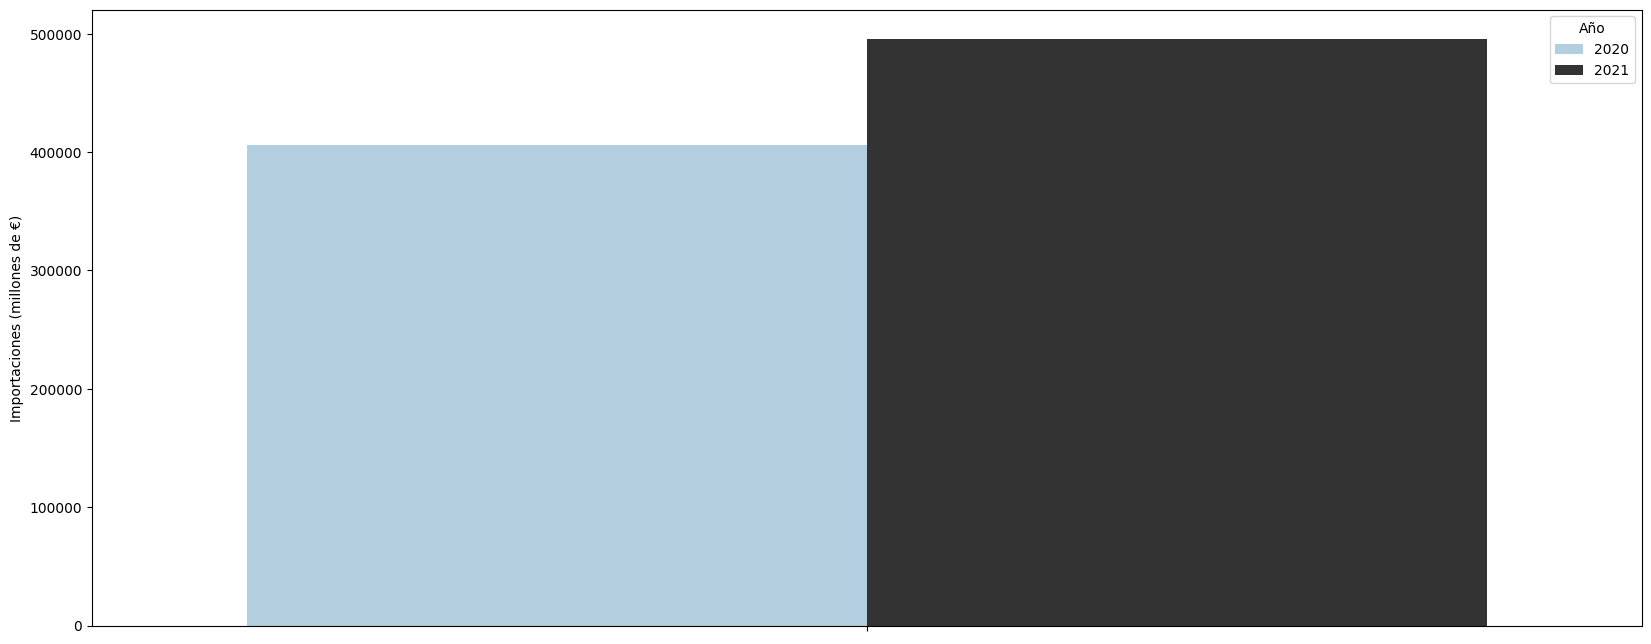

In [24]:
comercioBarplot = comercio[["Importaciones (millones de €)", "Año"]].groupby("Año").sum()
comercioImpFigura = plt.figure(figsize=(20,8))
sns.barplot(hue="Año",
            y="Importaciones (millones de €)",
            palette="Blues_d",
            data=comercioBarplot,
            errorbar=None);

In [25]:
# Guardar barplot
# comercioImpFigura.savefig('BarplotImp.png')

### 29. Creación de un Barplot para mostrar las exportaciones en los últimos diez años (2012-2021)

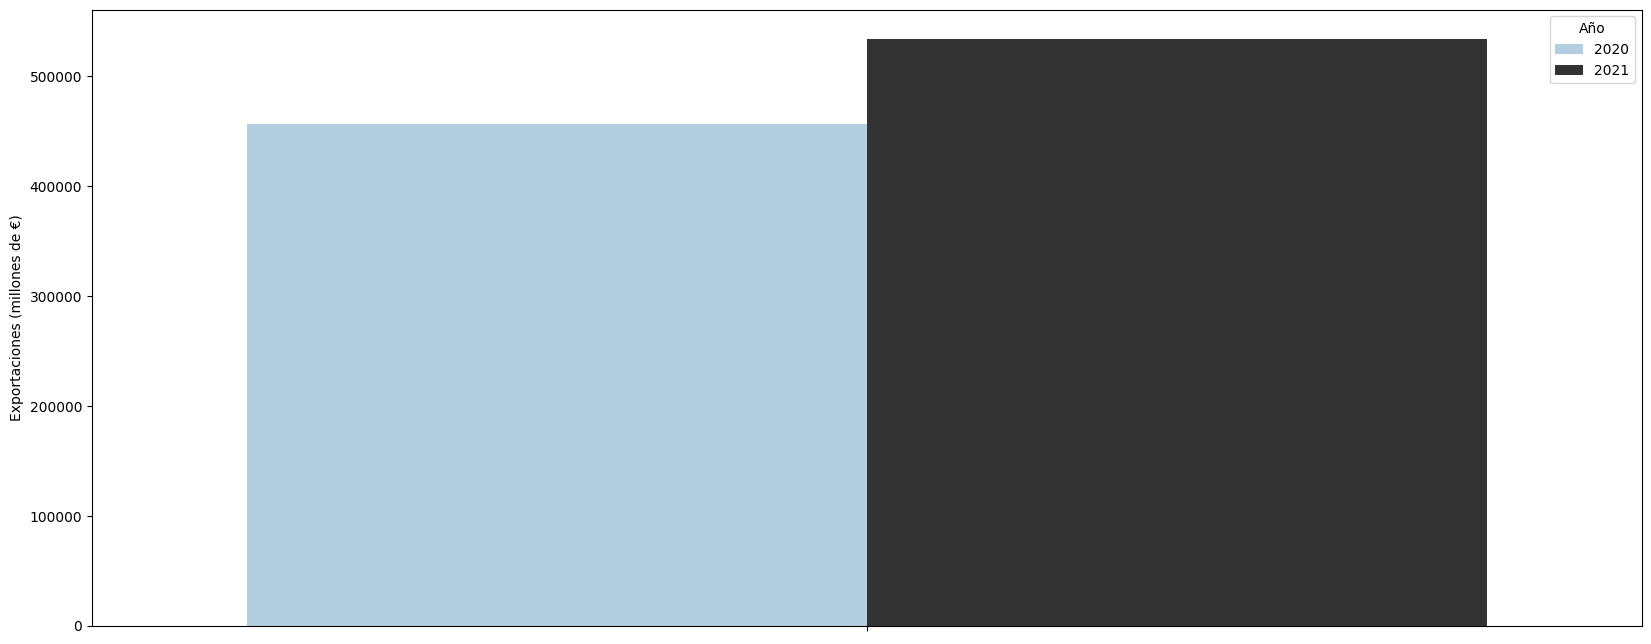

In [26]:
comercioBarplot = comercio[["Exportaciones (millones de €)", "Año"]].groupby("Año").sum()
comercioExpFigura = plt.figure(figsize=(20,8))
sns.barplot(hue="Año",
            y="Exportaciones (millones de €)",
            palette="Blues_d",
            data=comercioBarplot,
            errorbar=None);

In [27]:
# Guardar barplot
# comercioExpFigura.savefig('BarplotExp.png')

### 30. Creación de un treemap para mostrar los primeros 32 países de destino de las exportaciones de bienes desde Países Bajos en 2021

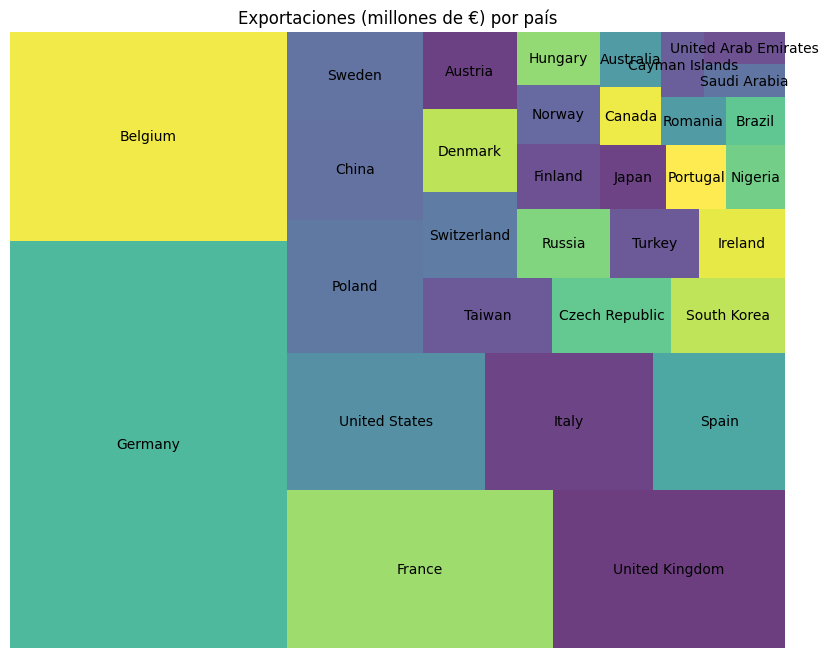

In [28]:
data = comercio2021.groupby("Países").sum()['Exportaciones (millones de €)'].sort_values(ascending=False)[:32]

plt.figure(figsize=(10,8))
squarify.plot(sizes=data.values, label=data.index, alpha=.8 )
plt.axis('off')
plt.title("Exportaciones (millones de €) por país")
plt.show()

### 31. Creación de un treemap para mostrar los primeros 32 países de origen de las importaciones de bienes a Países Bajos en 2021

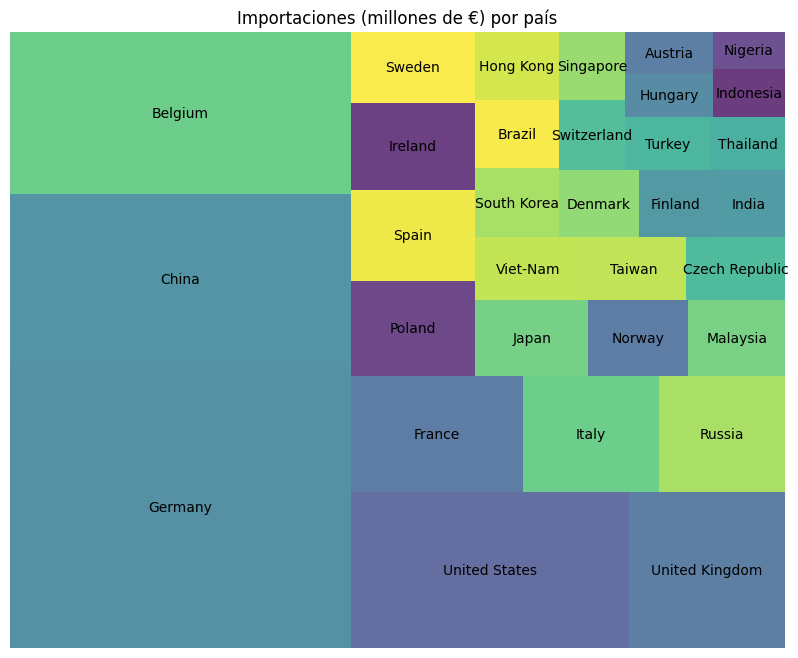

In [29]:
data = comercio2021.groupby("Países").sum()['Importaciones (millones de €)'].sort_values(ascending=False)[:32]

plt.figure(figsize=(10,8))
squarify.plot(sizes=data.values, label=data.index, alpha=.8 )
plt.axis('off')
plt.title("Importaciones (millones de €) por país")
plt.show()

### 32. Creación de una time series para representar la variación de las exportaciones en el tiempo para cada uno de los países en el top 10

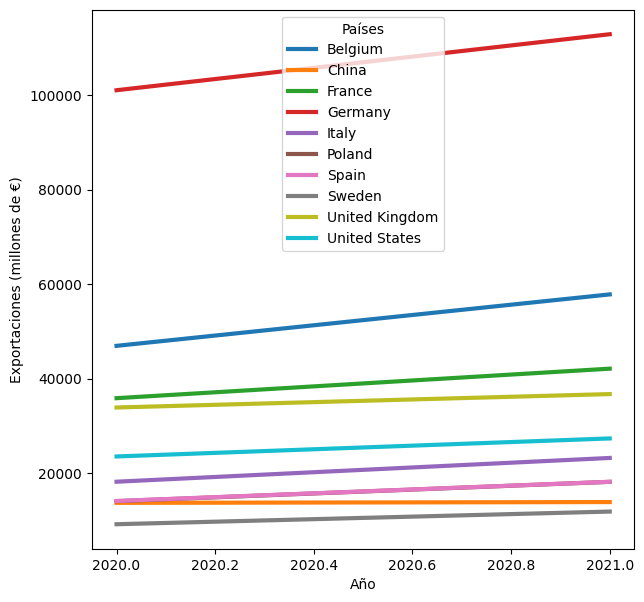

In [30]:
comercioTimeseries = comercio[comercio['Países'].isin(['Germany', 'Belgium', 'France', "United Kingdom", "United States", 'Italy', 'Spain', "Poland", "China", "Sweden"])]
comercioTimeseries = comercioTimeseries.groupby(['Países', 'Año']).sum()
comercioTimeseries.reset_index(inplace=True)
plt.figure(figsize=(7,7))
sns.lineplot(data=comercioTimeseries,
            x="Año",
            y="Exportaciones (millones de €)",
            hue="Países",
            linewidth = 3);

### 33. Creación de una time series para representar la variación de las importaciones en el tiempo para cada uno de los países en el top 10

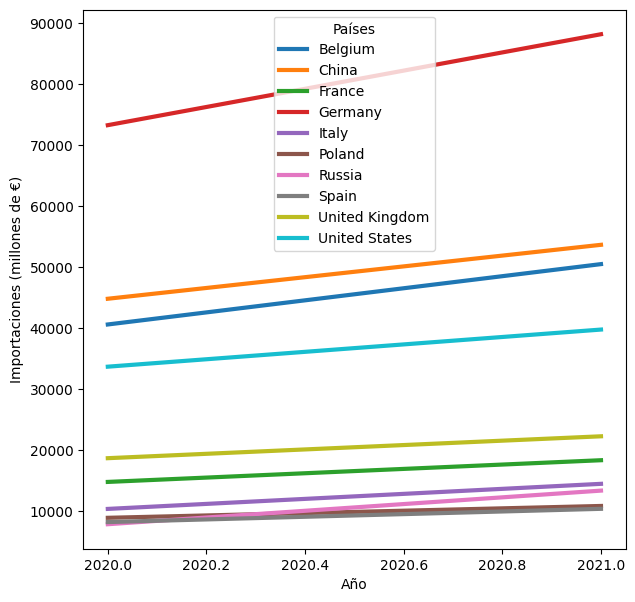

In [31]:
comercioTimeseries = comercio[comercio['Países'].isin(['Germany', "China", 'Belgium', "United States", "United Kingdom", 'France', 'Italy', "Russia", "Poland", 'Spain'])]
comercioTimeseries = comercioTimeseries.groupby(['Países', 'Año']).sum()
comercioTimeseries.reset_index(inplace=True)
plt.figure(figsize=(7,7))
sns.lineplot(data=comercioTimeseries,
            x="Año",
            y="Importaciones (millones de €)",
            hue="Países",
            linewidth = 3);

### 34. Creación de un lollipop para mostrar las exportaciones en 2021 por categorías de producto (SITC Nivel 1)

In [32]:
sitc = pd.read_excel("data/dataAfterCleaning/Sitc.xlsx", dtype = str)
sitc1 = sitc.rename(columns={"SITC": "SITC Nivel 1"})
sitc1.head()

,SITC Nivel 1,Producto
0,0,Food And Live Animals
1,00,Live Animals
2,001,Live Animals
3,01,Meat And Meat Preparations
4,011,"Meat Of Bovine Anim,Fresh,Chilled,Frozen"


In [33]:
lollipopExp = comercio2021.groupby("SITC Nivel 1")[["Exportaciones (millones de €)"]].sum()
lollipopExp = lollipopExp.reset_index()
lollipopExp.head()

,SITC Nivel 1,Exportaciones (millones de €)
0,0,70035.0
1,1,6324.0
2,2,28628.0
3,3,29839.0
4,4,5175.0


In [34]:
lollipopMergeExp = pd.merge(sitc1, lollipopExp)
lollipopMergeExp.head()

,SITC Nivel 1,Producto,Exportaciones (millones de €)
0,0,Food And Live Animals,70035.0
1,1,Beverages And Tobacco,6324.0
2,2,"Crude Materials, Inedible, Except Fuels",28628.0
3,3,"Mineral Fuels, Lubric. And Related Mtrls",29839.0
4,4,"Animal And Vegetable Oils,Fats And Waxes",5175.0


In [35]:
lollipopMergeExp = lollipopMergeExp.drop(columns="SITC Nivel 1")
lollipopMergeExp = lollipopMergeExp.set_index("Producto")
lollipopMergeExp = lollipopMergeExp.sort_values(by="Exportaciones (millones de €)", ascending=False)
lollipopMergeExp.head()

,Exportaciones (millones de €)
Producto,
Machinery And Transport Equipment,165532.0
"Chemicals And Related Products, N.E.S.",106886.0
Miscellaneous Manufactured Articles,70641.0
Food And Live Animals,70035.0
Manufactured Goods Classif. By Material,49752.0


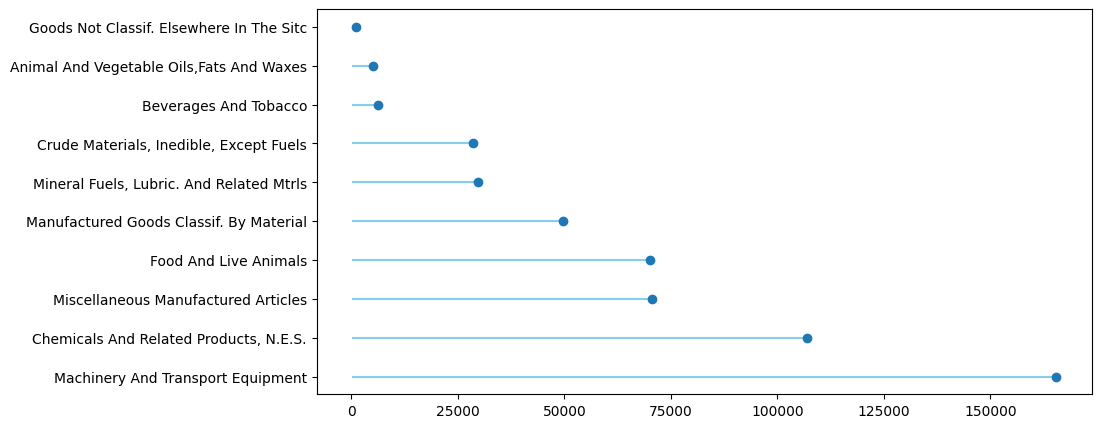

In [36]:
plt.figure(figsize=(10,5))
plt.hlines(y=lollipopMergeExp.index,
           xmin=150,
           xmax=lollipopMergeExp,
           color='skyblue')
plt.plot(lollipopMergeExp, lollipopMergeExp.index, "o");

### 35. Creación de un lollipop para mostrar las importaciones en 2021 por categorías de producto (SITC Nivel 1)

In [37]:
lollipopImp1 = comercio2021.groupby("SITC Nivel 1")[["Importaciones (millones de €)"]].sum()
lollipopImp1 = lollipopImp1.reset_index()
lollipopImp1.head()

,SITC Nivel 1,Importaciones (millones de €)
0,0,46461.0
1,1,4515.0
2,2,19545.0
3,3,57318.0
4,4,6989.0


In [38]:
lollipopMergeImp1 = pd.merge(sitc1, lollipopImp1)
lollipopMergeImp1.head()

,SITC Nivel 1,Producto,Importaciones (millones de €)
0,0,Food And Live Animals,46461.0
1,1,Beverages And Tobacco,4515.0
2,2,"Crude Materials, Inedible, Except Fuels",19545.0
3,3,"Mineral Fuels, Lubric. And Related Mtrls",57318.0
4,4,"Animal And Vegetable Oils,Fats And Waxes",6989.0


In [39]:
lollipopMergeImp1 = lollipopMergeImp1.drop(columns="SITC Nivel 1")
lollipopMergeImp1 = lollipopMergeImp1.set_index("Producto")
lollipopMergeImp1 = lollipopMergeImp1.sort_values(by="Importaciones (millones de €)", ascending=False)
lollipopMergeImp1.head()

,Importaciones (millones de €)
Producto,
Machinery And Transport Equipment,160067.0
"Chemicals And Related Products, N.E.S.",75074.0
Miscellaneous Manufactured Articles,72071.0
"Mineral Fuels, Lubric. And Related Mtrls",57318.0
Manufactured Goods Classif. By Material,53121.0


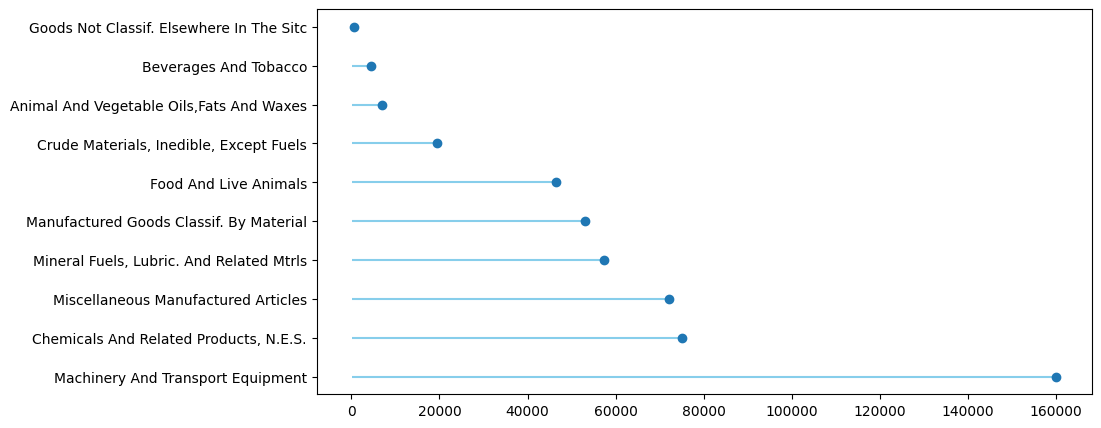

In [40]:
plt.figure(figsize=(10,5))
plt.hlines(y=lollipopMergeImp1.index,
           xmin=150,
           xmax=lollipopMergeImp1,
           color='skyblue')
plt.plot(lollipopMergeImp1, lollipopMergeImp1.index, "o");

### 36. Creación de un lollipop para mostrar las 10 categorías de producto (SITC Nivel 2) más exportadas en 2021

In [41]:
sitc2 = sitc.rename(columns={"SITC": "SITC Nivel 2"})
sitc2.head()

,SITC Nivel 2,Producto
0,0,Food And Live Animals
1,00,Live Animals
2,001,Live Animals
3,01,Meat And Meat Preparations
4,011,"Meat Of Bovine Anim,Fresh,Chilled,Frozen"


In [42]:
lollipopExp2 = comercio2021.groupby("SITC Nivel 2")[["Exportaciones (millones de €)"]].sum()
lollipopExp2 = lollipopExp2.reset_index()
lollipopExp2.head()

,SITC Nivel 2,Exportaciones (millones de €)
0,00,1763.0
1,01,10118.0
2,02,9310.0
3,03,4348.0
4,04,3319.0


In [43]:
lollipopMergeExp2 = pd.merge(sitc2, lollipopExp2)
lollipopMergeExp2.head()

,SITC Nivel 2,Producto,Exportaciones (millones de €)
0,00,Live Animals,1763.0
1,01,Meat And Meat Preparations,10118.0
2,02,Dairy Products And Birds' Eggs,9310.0
3,03,"Fish Crustaceans, Molluscs; Prep.Thereof",4348.0
4,04,Cereals And Cereal Preparations,3319.0


In [44]:
lollipopMergeExp2 = lollipopMergeExp2.drop(columns="SITC Nivel 2")
lollipopMergeExp2 = lollipopMergeExp2.set_index("Producto")
lollipopMergeExp2 = lollipopMergeExp2.sort_values(by="Exportaciones (millones de €)", ascending=False)
lollipopMergeExp2Head = lollipopMergeExp2.head(10)
lollipopMergeExp2Head.head()

,Exportaciones (millones de €)
Producto,
"Electr.Machines,Apparatus And Appliances",36410.0
Medicinal And Pharmaceutical Products,31570.0
Machinery For Particular Industries,29765.0
"Petroleum, Petrol.Prod.And Related Mtrls",27103.0
Telecom; Sound Recording And Reprod.App.,25110.0


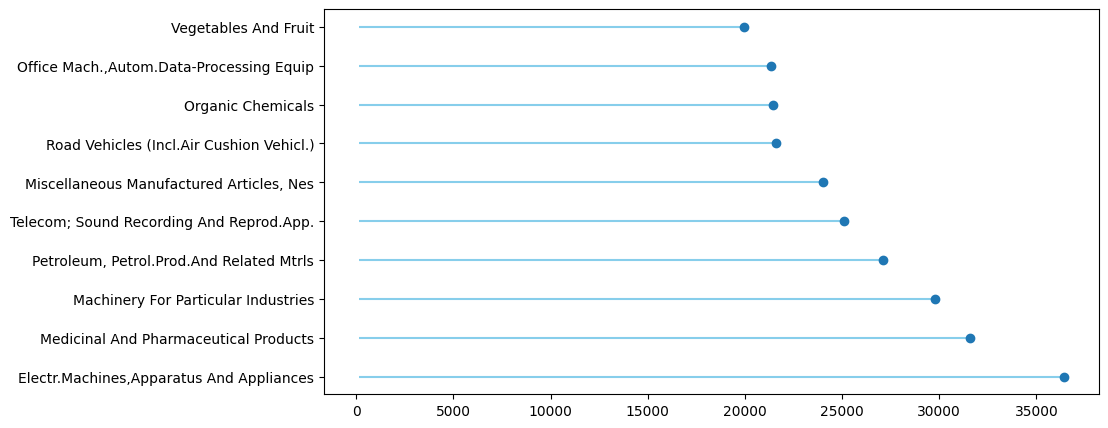

In [45]:
plt.figure(figsize=(10,5))
plt.hlines(y=lollipopMergeExp2Head.index,
           xmin=150,
           xmax=lollipopMergeExp2Head,
           color='skyblue')
plt.plot(lollipopMergeExp2Head, lollipopMergeExp2Head.index, "o");

### 37. Creación de un lollipop para mostrar las 10 categorías de producto (SITC Nivel 2) más importadas en 2021

In [46]:
lollipopImp2 = comercio2021.groupby("SITC Nivel 2")[["Importaciones (millones de €)"]].sum()
lollipopImp2 = lollipopImp2.reset_index()
lollipopImp2.head()

,SITC Nivel 2,Importaciones (millones de €)
0,00,1209.0
1,01,4847.0
2,02,4527.0
3,03,3109.0
4,04,5925.0


In [47]:
lollipopMergeImp2 = pd.merge(sitc2, lollipopImp2)
lollipopMergeImp2.head()

,SITC Nivel 2,Producto,Importaciones (millones de €)
0,00,Live Animals,1209.0
1,01,Meat And Meat Preparations,4847.0
2,02,Dairy Products And Birds' Eggs,4527.0
3,03,"Fish Crustaceans, Molluscs; Prep.Thereof",3109.0
4,04,Cereals And Cereal Preparations,5925.0


In [48]:
lollipopMergeImp2 = lollipopMergeImp2.drop(columns="SITC Nivel 2")
lollipopMergeImp2 = lollipopMergeImp2.set_index("Producto")
lollipopMergeImp2 = lollipopMergeImp2.sort_values(by="Importaciones (millones de €)", ascending=False)
lollipopMergeImp2Head = lollipopMergeImp2.head(10)
lollipopMergeImp2Head.head()

,Importaciones (millones de €)
Producto,
"Petroleum, Petrol.Prod.And Related Mtrls",52189.0
"Electr.Machines,Apparatus And Appliances",40459.0
Telecom; Sound Recording And Reprod.App.,27608.0
Road Vehicles (Incl.Air Cushion Vehicl.),25750.0
"Office Mach.,Autom.Data-Processing Equip",24085.0


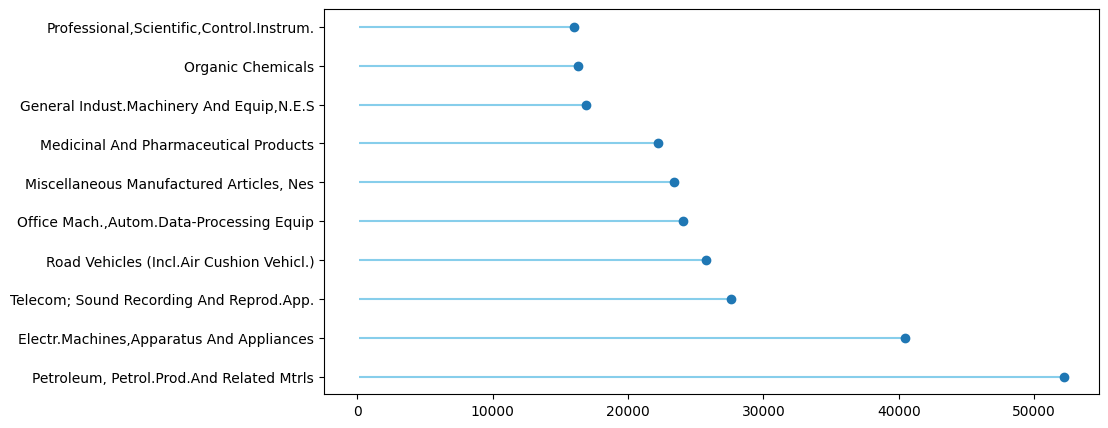

In [49]:
plt.figure(figsize=(10,5))
plt.hlines(y=lollipopMergeImp2Head.index,
           xmin=150,
           xmax=lollipopMergeImp2Head,
           color='skyblue')
plt.plot(lollipopMergeImp2Head, lollipopMergeImp2Head.index, "o");

### 38. Creación de un lollipop para mostrar las 10 categorías de producto (SITC Nivel 3) más exportadas en 2021

In [50]:
sitc3 = sitc.rename(columns={"SITC": "SITC Nivel 3"})
sitc3.head()

,SITC Nivel 3,Producto
0,0,Food And Live Animals
1,00,Live Animals
2,001,Live Animals
3,01,Meat And Meat Preparations
4,011,"Meat Of Bovine Anim,Fresh,Chilled,Frozen"


In [51]:
lollipopExp3 = comercio2021.groupby("SITC Nivel 3")[["Exportaciones (millones de €)"]].sum()
lollipopExp3 = lollipopExp3.reset_index()
lollipopExp3.head()

,SITC Nivel 3,Exportaciones (millones de €)
0,001,1763.0
1,011,2629.0
2,012,5848.0
3,016,645.0
4,017,996.0


In [52]:
lollipopMergeExp3 = pd.merge(sitc3, lollipopExp3)
lollipopMergeExp3.head()

,SITC Nivel 3,Producto,Exportaciones (millones de €)
0,001,Live Animals,1763.0
1,011,"Meat Of Bovine Anim,Fresh,Chilled,Frozen",2629.0
2,012,"Other Meat, Fresh, Chilled Or Frozen",5848.0
3,016,"Meat, Salted, Dried Or Smoked",645.0
4,017,"Prepared Or Preserved Meat, N.E.S.",996.0


In [53]:
lollipopMergeExp3 = lollipopMergeExp3.drop(columns="SITC Nivel 3")
lollipopMergeExp3 = lollipopMergeExp3.set_index("Producto")
lollipopMergeExp3 = lollipopMergeExp3.sort_values(by="Exportaciones (millones de €)", ascending=False)
lollipopMergeExp3Head = lollipopMergeExp3.head(10)
lollipopMergeExp3Head.head()

,Exportaciones (millones de €)
Producto,
"Petroleum Products, Refined",26943.0
Telecommunications Equipment,20889.0
Other Specialized Machinery,20185.0
Medicaments(Incl Veterinary Medicaments),16389.0
Med.And Pharm.Products(Excl Medicaments),15181.0


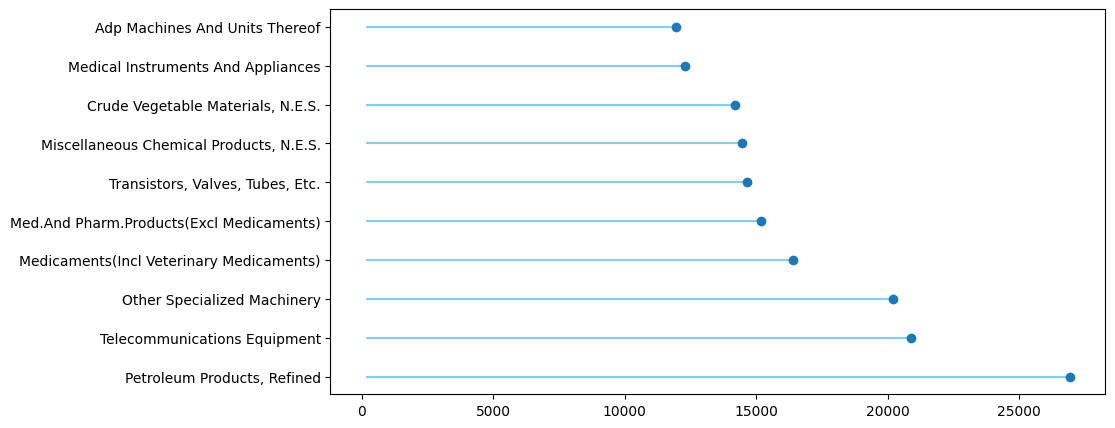

In [54]:
plt.figure(figsize=(10,5))
plt.hlines(y=lollipopMergeExp3Head.index,
           xmin=150,
           xmax=lollipopMergeExp3Head,
           color='skyblue')
plt.plot(lollipopMergeExp3Head, lollipopMergeExp3Head.index, "o");

### 39. Creación de un lollipop para mostrar las 10 categorías de producto (SITC Nivel 3) más importadas en 2021

In [55]:
lollipopImp3 = comercio2021.groupby("SITC Nivel 3")[["Importaciones (millones de €)"]].sum()
lollipopImp3 = lollipopImp3.reset_index()
lollipopImp3.head()

,SITC Nivel 3,Importaciones (millones de €)
0,001,1209.0
1,011,1626.0
2,012,1906.0
3,016,347.0
4,017,968.0


In [56]:
lollipopMergeImp3 = pd.merge(sitc3, lollipopImp3)
lollipopMergeImp3.head()

,SITC Nivel 3,Producto,Importaciones (millones de €)
0,001,Live Animals,1209.0
1,011,"Meat Of Bovine Anim,Fresh,Chilled,Frozen",1626.0
2,012,"Other Meat, Fresh, Chilled Or Frozen",1906.0
3,016,"Meat, Salted, Dried Or Smoked",347.0
4,017,"Prepared Or Preserved Meat, N.E.S.",968.0


In [57]:
lollipopMergeImp3 = lollipopMergeImp3.drop(columns="SITC Nivel 3")
lollipopMergeImp3 = lollipopMergeImp3.set_index("Producto")
lollipopMergeImp3 = lollipopMergeImp3.sort_values(by="Importaciones (millones de €)", ascending=False)
lollipopMergeImp3Head = lollipopMergeImp3.head(10)
lollipopMergeImp3Head.head()

,Importaciones (millones de €)
Producto,
"Petroleum Oils, Crude",29893.0
Telecommunications Equipment,23100.0
"Petroleum Products, Refined",22296.0
"Transistors, Valves, Tubes, Etc.",16780.0
Adp Machines And Units Thereof,15401.0


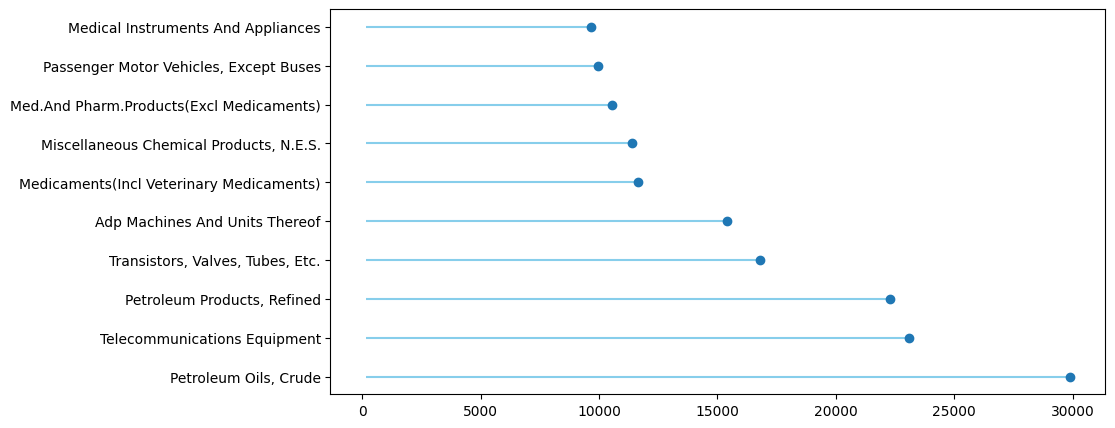

In [58]:
plt.figure(figsize=(10,5))
plt.hlines(y=lollipopMergeImp3Head.index,
           xmin=150,
           xmax=lollipopMergeImp3Head,
           color='skyblue')
plt.plot(lollipopMergeImp3Head, lollipopMergeImp3Head.index, "o");

### 40. Cuál es la categoría de producto (SITC Nivel 3) más exportada por Países Bajos en 2021 a cada país del top 10. Alemania y Bélgica como ejemplo

In [59]:
productoPaisExp = comercio2021[comercio2021["Países"].isin(['Germany', 'Belgium', 'France', "United Kingdom", "United States", 'Italy', 'Spain', "Poland", "China", "Sweden"])]
productoPaisExp = productoPaisExp.groupby(["Países", "Producto"]).sum()['Exportaciones (millones de €)'].sort_values(ascending=False)
productoPaisExp = productoPaisExp.reset_index()
productoPaisExp.head()

,Países,Producto,Exportaciones (millones de €)
0,Belgium,Petroleum oils and oils obtained ...,6831.0
1,Germany,"Telecommunications equipment, n.e...",4682.0
2,United States,Petroleum oils and oils obtained ...,3713.0
3,Germany,"Crude vegetable materials, n.e.s.",3565.0
4,Germany,Medicaments (including veterinary...,3287.0


In [60]:
productoGermanyExp = productoPaisExp[productoPaisExp["Países"] == "Germany"]
productoGermanyExp = productoGermanyExp.head(1)
productoGermanyExp

,Países,Producto,Exportaciones (millones de €)
1,Germany,"Telecommunications equipment, n.e...",4682.0


In [61]:
productoBelgiumExp = productoPaisExp[productoPaisExp["Países"] == "Belgium"]
productoBelgiumExp = productoBelgiumExp.head(1)
productoBelgiumExp

,Países,Producto,Exportaciones (millones de €)
0,Belgium,Petroleum oils and oils obtained ...,6831.0


In [62]:
productoPaisesExp = pd.concat([productoGermanyExp, productoBelgiumExp])
productoPaisesExp = productoPaisesExp.set_index("Países")
productoPaisesExp

,Producto,Exportaciones (millones de €)
Países,,
Germany,"Telecommunications equipment, n.e...",4682.0
Belgium,Petroleum oils and oils obtained ...,6831.0


### 41. Cuál es la categoría de producto (SITC Nivel 3) más importada por Países Bajos en 2021 desde cada país del top 10. Alemania y China como ejemplo

In [63]:
productoPaisImp = comercio2021[comercio2021["Países"].isin(['Germany', "China", 'Belgium', "United States", "United Kingdom", 'France', 'Italy', "Russia", "Poland", 'Spain'])]
productoPaisImp = productoPaisImp.groupby(["Países", "Producto"]).sum()['Importaciones (millones de €)'].sort_values(ascending=False)
productoPaisImp = productoPaisImp.reset_index()
productoPaisImp.head()

,Países,Producto,Importaciones (millones de €)
0,Russia,Petroleum oils and oils obtained ...,10976.0
1,China,"Telecommunications equipment, n.e...",7735.0
2,Belgium,Petroleum oils and oils obtained ...,6215.0
3,China,Automatic data-processing machine...,5706.0
4,United Kingdom,Petroleum oils and oils obtained ...,5373.0


In [64]:
productoGermanyImp = productoPaisImp[productoPaisImp["Países"] == "Germany"]
productoGermanyImp = productoGermanyImp.head(1)
productoGermanyImp

,Países,Producto,Importaciones (millones de €)
6,Germany,Motor cars and other motor vehicl...,4275.0


In [65]:
productoChinaImp = productoPaisImp[productoPaisImp["Países"] == "China"]
productoChinaImp = productoChinaImp.head(1)
productoChinaImp

,Países,Producto,Importaciones (millones de €)
1,China,"Telecommunications equipment, n.e...",7735.0


In [66]:
productoPaisesImp = pd.concat([productoGermanyImp, productoChinaImp])
productoPaisesImp = productoPaisesImp.set_index("Países")
productoPaisesImp

,Producto,Importaciones (millones de €)
Países,,
Germany,Motor cars and other motor vehicl...,4275.0
China,"Telecommunications equipment, n.e...",7735.0


### 42. Creación de globos interactivos para mostrar las importaciones/exportaciones a/desde Países Bajos en 2021 desde/a cada país, con/sin nombre de los países

In [67]:
globo2021 = pd.read_csv("data/dataAfterCleaning/Globo2021.csv")

In [68]:
fig_orth = px.scatter_geo(globo2021, lon='Longitude', lat='Latitude',
                            hover_name='Exportaciones (millones de €)', 
                            size='Exportaciones (millones de €)', 
                            text='Países',
                            projection="orthographic"
                            )
fig_orth.show()

In [69]:
fig_orth_1 = px.scatter_geo(globo2021, lon='Longitude', lat='Latitude',
                                hover_name='Exportaciones (millones de €)', 
                                size='Exportaciones (millones de €)',
                                projection="orthographic"
                                )
fig_orth_1.show()

In [70]:
fig_orth_2 = px.scatter_geo(globo2021, lon='Longitude', lat='Latitude',
                            hover_name='Importaciones (millones de €)', 
                            size='Importaciones (millones de €)', 
                            text='Países',
                            projection="orthographic"
                            )
fig_orth_2.show()

In [71]:
fig_orth_3 = px.scatter_geo(globo2021, lon='Longitude', lat='Latitude',
                            hover_name='Importaciones (millones de €)', 
                            size='Importaciones (millones de €)', 
                            projection="orthographic"
                            )
fig_orth_2.show()